In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd
from math import floor
from scipy.optimize import curve_fit as cf
import scipy.stats as stats

In [6]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['font.size'] = 15
mpl.rcParams['errorbar.capsize'] = 3
mpl.rcParams['lines.markeredgewidth'] = 1
mpl.rcParams['axes.axisbelow'] = True

In [7]:
dcmls = lambda x : -int(floor(np.log10(abs(x))))

round_error = lambda value,rounder : np.round(value,dcmls(rounder))

def chi2(y,y_err,x,func,popt):
    y_ajuste = func(x,*popt)
    chi_cuadrado = np.sum(((y-y_ajuste)/y_err)**2)
    return chi_cuadrado

def chi2_red(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    chi_reducido = chi_cuadrado/grados_lib
    return chi_reducido

def pvalue(y,y_err,x,func,popt):
    chi_cuadrado = chi2(y,y_err,x,func,popt)
    puntos = len(y)
    params = len(popt)
    grados_lib = puntos - params - 1
    pvalor = stats.chi2.sf(chi_cuadrado,grados_lib)
    return pvalor

In [20]:
files = os.listdir('clase1/tanda full 1')
names = []
for i in range(len(files)):
    if files[i].endswith('.csv'):
        names.append(int(files[i][:-4]))
names = np.sort(np.array(names))

In [25]:
from scipy.signal import find_peaks as fp

(-0.02, -0.01)

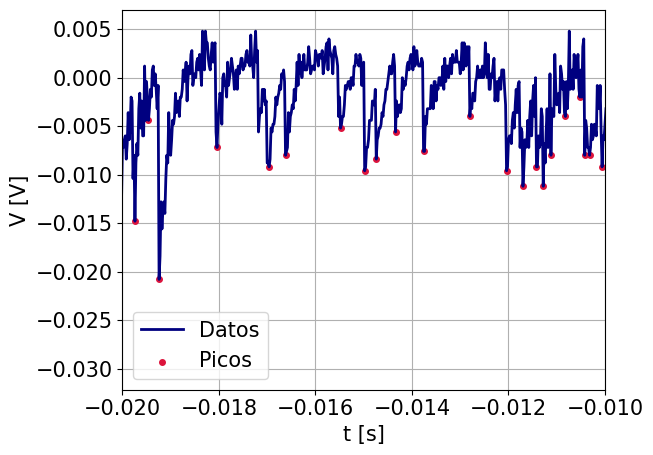

In [37]:
df = pd.read_csv('clase1/tanda full 1/0.csv')

pk_idxs = fp(-df.V1,distance=5,prominence=0.005)[0]

plt.plot(df.t,df.V1,'navy',label='Datos')
plt.scatter(df.t[pk_idxs],df.V1[pk_idxs],c='crimson',label='Picos')
plt.xlabel('t [s]')
plt.ylabel('V [V]')
plt.legend()
plt.grid()
plt.tight_layout()
plt.xlim(-0.02,-0.01)